In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Gradient Descent With Linear Regression

Our goal for this notebook is to learn a model that predicts the value of $y$ based on the value of $x$. We will use an iterative process to guess the original values for $w$ and $b$.

Choose some values for $w$ and $b$!



In [2]:
# Use these values for w and b. Note, in the real world we would not
# have access to these original parameters
w = 5
b = 3

First, we generate a dataset that is approximately linear:

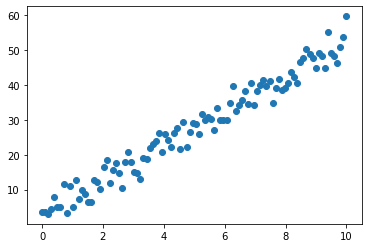

In [3]:
# Create 100 data points
n = 100

# Make some noisy data
x = np.linspace(0, 10, n)
epsilon = np.random.normal(size=(n))*3 # normally distributed noise
y = (w*x + b) + epsilon

plt.scatter(x, y)
plt.show()

This data is approximately linear (with some added noise, which we would find in the real world). So, we will try to fit a linear function

$$\hat{y} = \theta_1 x + \theta_0.$$

In this equation, we define $\hat{y}$ to be our estimation of what we expect the value of $y$ should be given some $x$ input data and using some guess $\theta$.

Our initial guess for the $\theta$ parameters, and consequently our initial calculation for $\hat{y}$, will probably be really bad, which should be reflected by our loss function initially having a high value.

Our goal is to have our $\theta$ parameters converge into the original values of $w$ and $b$. We will do so by minimizing our loss function $J$.

Our function $J_\theta$ represents how wrong our guesses $\hat{y}$ are with respect to $y$. The loss function we will use for $J$ is MSE (mean squared error). This loss function is a very common function for regression based problems due to a probabilistic derivation of which we will not go into during this notebook.


$$J_\theta = \frac{1}{2n} \sum_{i=1}^n(y_i - \hat{y_i})^2 = \frac{1}{2n} \sum_{i=1}^n(y_i - (\theta_1 x_i + \theta_0))^2$$

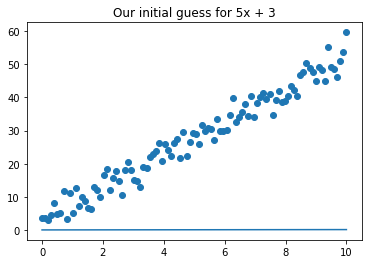

In [4]:
# our initial guesses for theta_0 and theta_1
theta = [-0.01, 0.01]

# our model, yhat = theta[1] * x + theta[0]
def model(x):
    return theta[1] * x + theta[0]

# our loss function = 1/(2*n) sum((y-yhat)**2)
def mean_squared_error(y, yhat):
    return 1/(2*n) * sum((y - yhat)**2)

# Now let's plot our current guess
yhat = model(x)
plt.plot(x, yhat)
plt.scatter(x, y)
plt.title('Our initial guess for {0}x + {1}'.format(w, b))
plt.show()

Our initial guess is pretty bad.

To converge our $\theta$ values to the actual values for $w$ and $b$, we will utilize an iterative process called gradient descent. 

Gradient descent simply utilizes a loss function ($J_\theta$) and minimizes the loss function with respect to $\theta$ to make your guesses more accurate.  

It finds the direction to move $\theta_0$ and $\theta_1$ by using partial derivatives. If $\frac{\partial J_\theta}{\partial \theta_0}$ is positive, then we know increasing $\theta_0$ makes $J_\theta$ bigger, which meansyour predictions are less accurate. Hence we will be subtracting the partial derivatives in each update step. Also note that as your guesses get closer to the true values of w and b, your derivatives will become flatter and thus smaller. $\frac{d J_\theta}{d\theta}$ therefore, naturally decreases over time causing you to take smaller steps as you slowly converge.

We also scale how much the parameters move in each update step using a value known as the learning rate, also commonly referred to as $\alpha$ (alpha). 

To actually move our theta closer to the true values, we use an update rule.

The general Gradient Descent update rule is as follows:

$$\theta_i = \theta_i - \alpha \frac{\partial J_\theta}{\partial \theta_i}$$

We will use $\alpha = 1 \cdot 10^{-3}$. 

Let's recall that

$$J_\theta = \frac{1}{2n} \sum_{i=1}^n(y_i - \hat{y_i})^2$$
and
$$\hat{y_i} = \theta_1 x_i + \theta_0$$

Therefore our partial derivatives are as follows:
$$\frac{\partial J_\theta}{\partial \theta_0} = \frac{1}{n} \sum_{i=1}^n \left( (y_i - \hat{y_i})(-1) \cdot 1 \right)$$

$$\frac{\partial J_\theta}{\partial \theta_1} = \frac{1}{n} \sum_{i=1}^n \left( (y_i - \hat{y_i})(-1) \cdot x \right)$$

Finally, because Gradient Descent is an iterative approach we must specify how many times do we repeat our learning update rule until we slowly converge. We typically define the number of update steps as the number of epochs. 

This method enables us to slowly converge our $\theta$ parameters to some values which give us good predictions for $\hat{y}$.


Estimated 5.104243794017015x + 0.8118278638181261


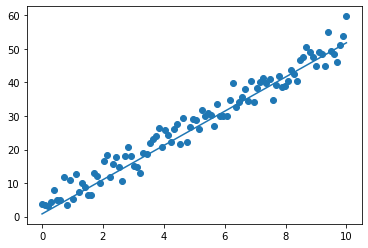

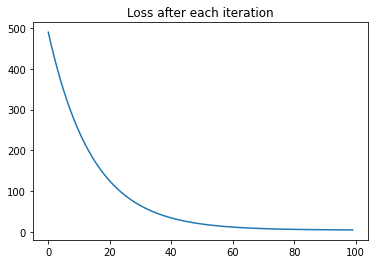

In [5]:
# learning rate/Alpha
learning_rate = 1e-3

# Let's define the number of training iterations and a metric to record our loss
epochs = 100
historical_loss = []

# Finally let's train
for i in range(epochs):
    yhat = model(x) # make our prediction
    historical_loss.append(mean_squared_error(y,yhat)) # record loss
    theta[0] -= learning_rate * 1/n * sum((y - yhat) * (-1) * 1) # update theta[0] (our guess for b)
    theta[1] -= learning_rate * 1/n * sum((y - yhat) * (-1) * x) # update theta[1] (our guess for w)
    
# Plot our regression
print('Estimated {0}x + {1}'.format(theta[1], theta[0]))
plt.plot(x, yhat)
plt.scatter(x, y)
plt.show()

# Plot our loss function
plt.plot(historical_loss)
plt.title('Loss after each iteration')
plt.show()

## Appendix: Gradient derivations

1. $\frac{\partial J_\theta}{\partial \theta_0}$

First, use the chain rule:

$$\frac{\partial J_\theta}{\partial \theta_0} 
= \frac{\partial J_\theta}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta_0} $$


Next, find $\frac{\partial J_\theta}{\partial \hat{y_i}}$:

$$\frac{\partial J_\theta}{\partial \hat{y_i}} = \frac{1}{n} (y_i - \hat{y_i})(-1)  $$

Find $\frac{\partial \hat{y_i}}{\partial \theta_0}$:

$$\frac{\partial \hat{y_i}}{\partial \theta_0} = 1 $$

Finally,

$$ \frac{\partial J_\theta}{\partial \theta_0} 
= \frac{\partial J_\theta}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta_0} 
= \frac{1}{n} \sum_{i=1}^n \left( (y_i - \hat{y_i})(-1) \cdot 1 \right)$$

2. $\frac{\partial J_\theta}{\partial \theta_1}$

Use the chain rule:

$$\frac{\partial J_\theta}{\partial \theta_1} 
= \frac{\partial J_\theta}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta_1} $$

We have already found $\frac{\partial J_\theta}{\partial \hat{y_i}}$.

Find $\frac{\partial \hat{y_i}}{\partial \theta_1}$:

$$\frac{\partial \hat{y_i}}{\partial \theta_1} = x $$

Finally,

$$\frac{\partial J_\theta}{\partial \theta_1} 
= \frac{\partial J_\theta}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta_1} 
= \frac{1}{n} \sum_{i=1}^n \left( (y_i - \hat{y_i})(-1) \cdot x \right) $$